# [기타리스트](https://www.acmicpc.net/problem/1495)

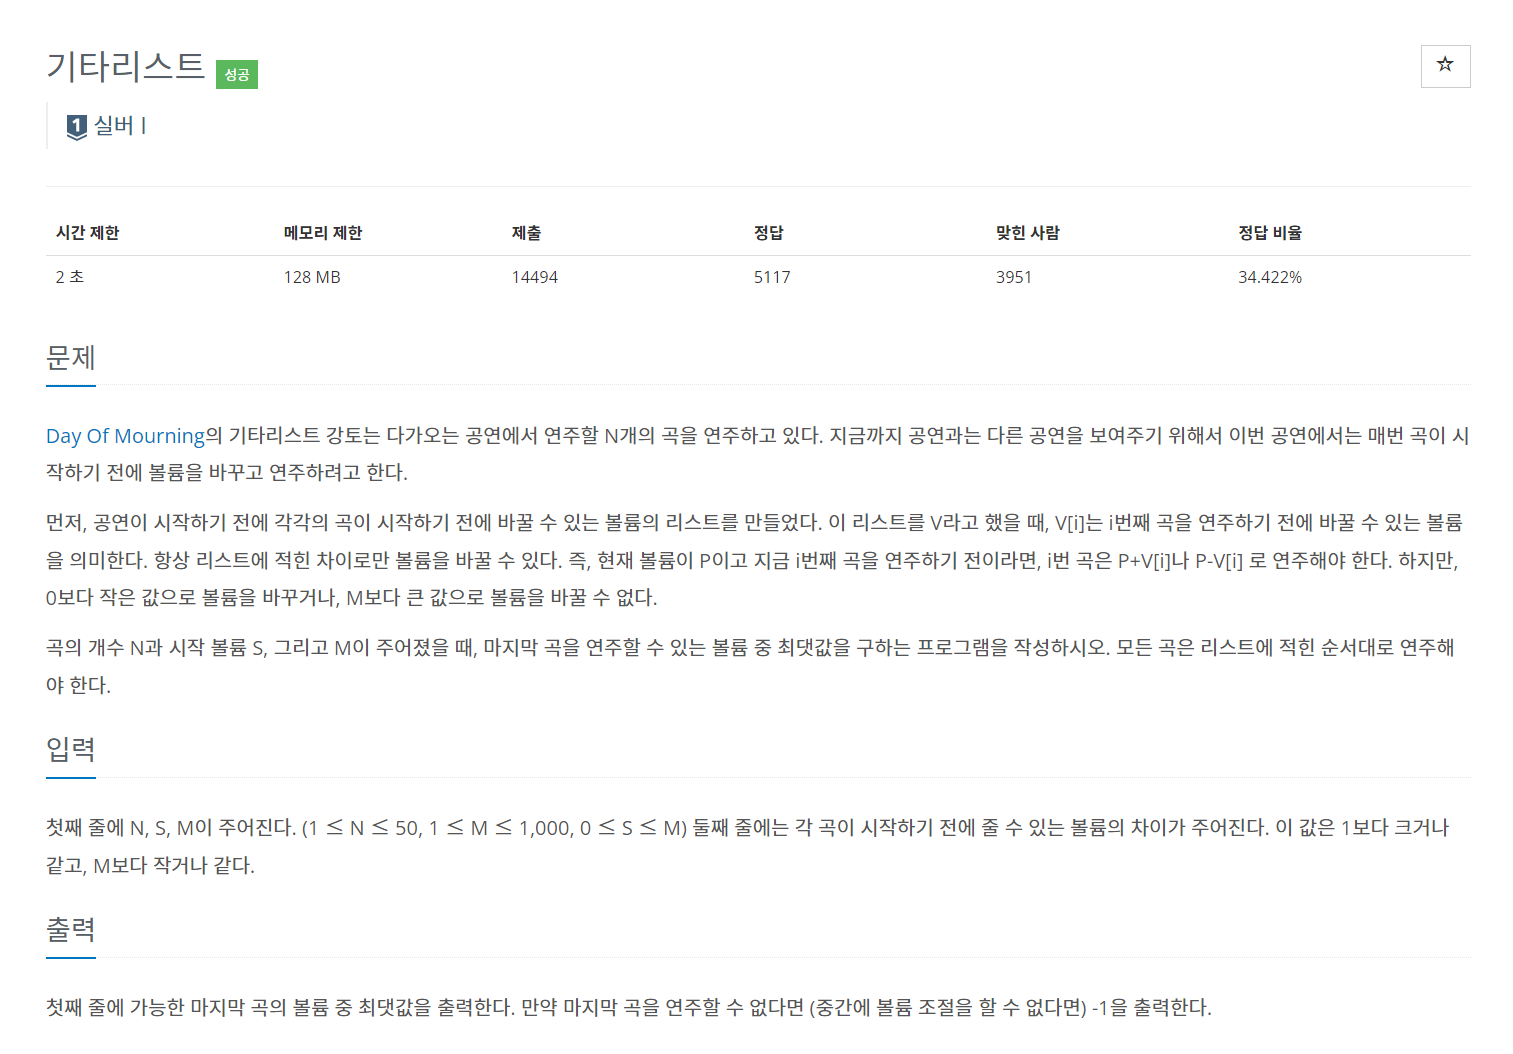

<!-- ![](image/1495.png) -->
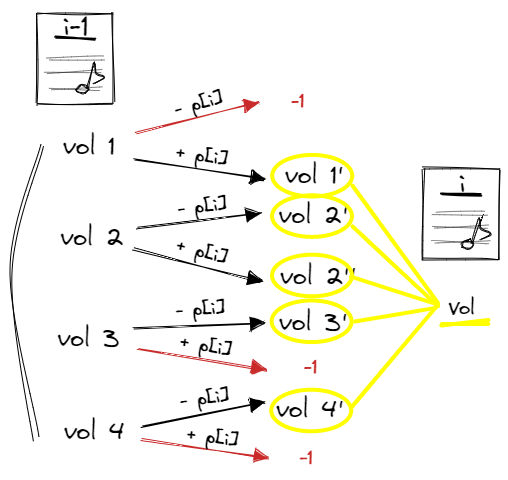

## 상태 체크
- 이전의 볼륨에서 더하거나 빼거나 2가지 방법으로 분기한다.
- 특정 값을 넘어가거나 0보다 작아지면 -1이 된다.
- 매 순간 조절가능한 볼륨이 달라진다.


# 즉, 모든 가능한 볼륨을 확인해야 함.


볼륨의 범위는 0 부터 m까지 가능.  


## DP[i] 정의 : i번째 곡을 연주할 수 있는 볼륨은 True값을 갖는다.

In [ ]:
import sys

input = sys.stdin.readline

n, s, m = map(int, input().split())

# 0부터 m까지 모든 가능 볼륨을 저장해둔다.
dp = [[False]*(m+1) for _ in range(n)]  # i번째 연주 볼륨
p = list(map(int, input().split()))

# 출력할 답 저장 변수 vol
vol = -1

a = s+p[0] # 첫 번째 곡 연주할 가능성이 있는 볼륨
b = s-p[0] # 첫 번째 곡 연주할 가능성이 있는 볼륨

#연주 가능한지 체크
if a <= m:
    dp[0][a] = True 
    vol = max(vol, a)
if b >= 0:
    dp[0][b] = True
    vol = max(vol, b)

for i in range(n-1): # 현재 연주할 곡(i+1)은 이전 곡(i)의 볼륨에서 결정한다. 
    vol = -1  # i+1번째 최대 볼륨
    for j in range(m, -1, -1):
        if dp[i][j]:  # (다음 i+1번째 연주에 영항을 주는 볼륨 : j)
            a = j + p[i+1]
            b = j - p[i+1]
            if a <= m:
                dp[i+1][a] = True
                vol = max(vol, a)
            if b >= 0:
                dp[i+1][b] = True
                vol = max(vol, b)
    if vol == -1:
        break


print(vol)